In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from src.model import UNet
from src.dataset import get_load_data
from torch.utils.data import DataLoader
from src.predict import predict
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
unet_model = UNet(num_classes=21)
train, test = get_load_data(root = "../../data", dataset = "VOCSegmentation", download = False)  
test_set = DataLoader(test, batch_size=1)

trained_model_path = "../model_weights/model_weights.pt"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))
imgs, smnts = next(iter(test_set))
preds = predict(model, imgs)

In [67]:
model.eval()
preds = model(imgs)

In [73]:
preds[0][:,250,50]

tensor([  4.9673,   1.6204, -10.3415, -10.4146, -10.7610, -10.0620, -10.1855,
         -9.3876,  -9.8329, -10.2686,  -8.7410, -10.6245,  -9.7564,  -8.7371,
        -10.1128, -10.1963,  -9.8865,  -9.1921, -10.4561, -10.9012, -10.5132],
       grad_fn=<SelectBackward0>)

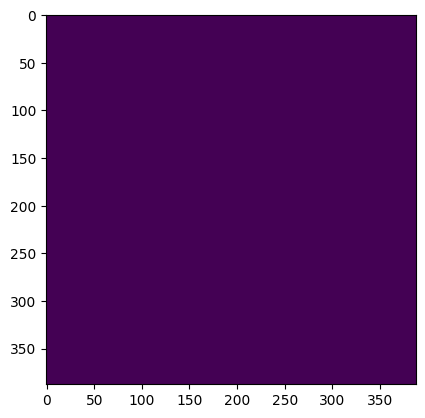

In [17]:
import matplotlib.pyplot as plt 

plt.imshow(preds[0])

In [53]:
imgs, smnts = next(iter(test_set))
import torchvision.transforms as T
transform = T.ToPILImage()
smnts = torch.where(smnts == 255, 0, smnts)
smnts = transform(smnts.squeeze(0))


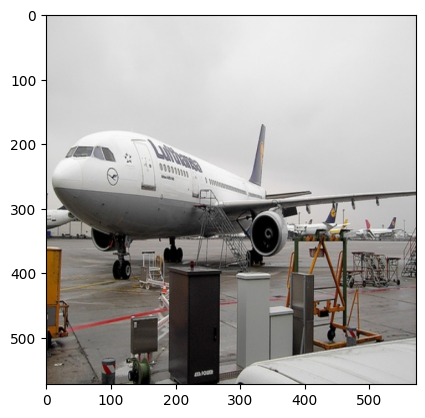

In [60]:
plt.imshow(imgs[0].permute(1,2,0))

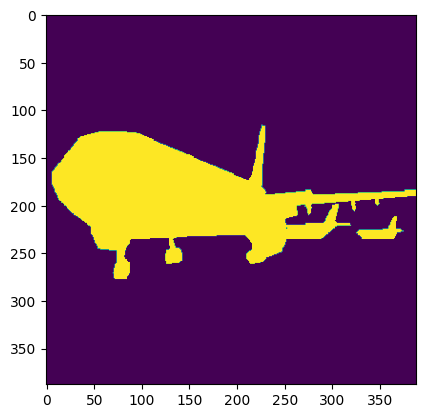

In [49]:
plt.imshow(smnts[0].squeeze(0))